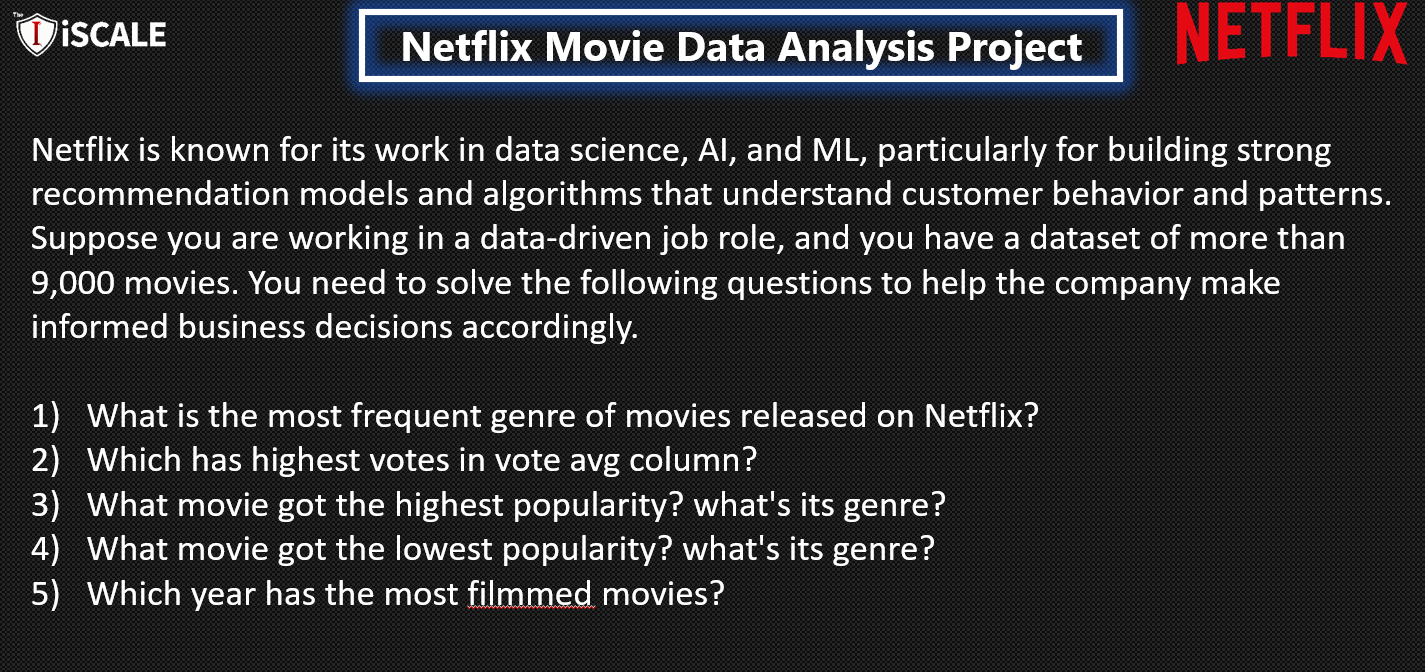

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')

In [146]:
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


### Exploration Summary
• we have a dataframe consisting of 9827 rows and 9 columns.

• our dataset looks a bit tidy with no NaNs nor duplicated values.

• Release_Date column needs to be casted into date time and to extract only the

• Overview, Original_Languege and Poster-Url wouldn't be so useful during analys

• there is noticable outliers in Popularity column

• Vote_Average bettter be categorised for proper analysis.

• Genre column has comma saperated values and white spaces that needs to be hand

In [148]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [149]:
df.duplicated().sum()

0

In [150]:
df['Title'].value_counts()[df['Title'].value_counts() > 1][:5]

Title
Beauty and the Beast    4
Alice in Wonderland     4
The Little Mermaid      3
The Call                3
Halloween               3
Name: count, dtype: int64

In [151]:
df[df['Title']=='The Call']

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
1297,2013-03-14,The Call,Jordan Turner is an experienced 911 operator b...,55.790,2448,6.8,en,"Crime, Thriller",https://image.tmdb.org/t/p/original/mG334OlDVJ...
7468,2020-11-27,The Call,Connected by phone in the same home but 20 yea...,16.004,462,7.6,ko,"Thriller, Mystery, Science Fiction",https://image.tmdb.org/t/p/original/oz8hvZHg7t...
9359,2020-10-23,The Call,"In the fall of 1987, a group of small-town fri...",13.777,83,5.4,en,"Horror, Thriller",https://image.tmdb.org/t/p/original/iKmykghTmv...


In [152]:
df['Release_Date']= pd.to_datetime(df['Release_Date'])

In [153]:
df['Release_Date'].info

<bound method Series.info of 0      2021-12-15
1      2022-03-01
2      2022-02-25
3      2021-11-24
4      2021-12-22
          ...    
9822   1973-10-15
9823   2020-10-01
9824   2016-05-06
9825   2021-03-31
9826   1984-09-23
Name: Release_Date, Length: 9827, dtype: datetime64[ns]>

In [154]:
df['Release_Date']=df['Release_Date'].dt.year

In [155]:
df.head(2)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


In [157]:
cols=['Overview','Original_Language','Poster_Url']
df.drop(cols,axis=1,inplace=True)

In [158]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


### categorizing Vote_Average column

In [159]:
pd.cut(df['Vote_Average'], bins=4)


0       (7.5, 10.0]
1       (7.5, 10.0]
2        (5.0, 7.5]
3       (7.5, 10.0]
4        (5.0, 7.5]
           ...     
9822    (7.5, 10.0]
9823     (2.5, 5.0]
9824     (2.5, 5.0]
9825     (5.0, 7.5]
9826    (7.5, 10.0]
Name: Vote_Average, Length: 9827, dtype: category
Categories (4, interval[float64, right]): [(-0.01, 2.5] < (2.5, 5.0] < (5.0, 7.5] < (7.5, 10.0]]

In [160]:
def categorize_vote_avg(df,col,labels):
    edges=[df[col].describe()['min'],
          df[col].describe()['25%'],
          df[col].describe()['50%'],
          df[col].describe()['75%'],
          df[col].describe()['max']
         ]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')

    print(f"Edge values for binning '{col}':", edges)
    return df

In [161]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
categorize_vote_avg(df, 'Vote_Average', labels)


Edge values for binning 'Vote_Average': [0.0, 5.9, 6.5, 7.1, 10.0]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,not_popular,Horror
9824,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


In [163]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


### we'd split genres into a list and then explode our dataframe to have only one genre per row for ezch movie

In [164]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')

In [165]:
df['Genre']

0       [Action, Adventure, Science Fiction]
1                 [Crime, Mystery, Thriller]
2                                 [Thriller]
3       [Animation, Comedy, Family, Fantasy]
4         [Action, Adventure, Thriller, War]
                        ...                 
9822                          [Drama, Crime]
9823                                [Horror]
9824             [Mystery, Thriller, Horror]
9825                 [Music, Drama, History]
9826           [War, Drama, Science Fiction]
Name: Genre, Length: 9827, dtype: object

In [183]:
df=df.explode('Genre')

In [185]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
1,2022,The Batman,3827.658,1151,popular,Crime
1,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
9825,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
9825,2021,The United States vs. Billie Holiday,13.354,152,average,History
9826,1984,Threads,13.354,186,popular,War
9826,1984,Threads,13.354,186,popular,Drama


In [186]:
df=df.reset_index(drop=True)
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama


In [188]:
df['Genre'] = df['Genre'].astype('category')

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25793 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 756.7+ KB


In [190]:
df.nunique()

Release_Date     102
Title           9513
Popularity      8160
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

## Data Visualization

In [203]:
# setting up seaborn configurations
sns.set_style('ticks')


### Q1: What is the most frequent genre in the dataset?


In [210]:
df['Genre'].value_counts()

Genre
Drama              3744
Comedy             3031
Action             2686
Thriller           2488
Adventure          1853
Romance            1476
Horror             1470
Animation          1439
Family             1414
Fantasy            1308
Science Fiction    1273
Crime              1242
Mystery             773
History             427
War                 308
Music               295
Documentary         215
TV Movie            214
Western             137
Name: count, dtype: int64

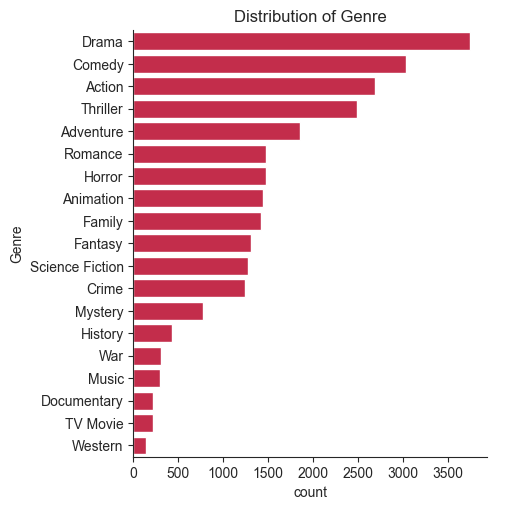

In [227]:
sns.catplot(data=df, y='Genre', kind='count', order=df['Genre'].value_counts().index, color='crimson')
plt.title("Distribution of Genre")
plt.show()

we can notice from the above visual that Drama genre is the most frequent genre
in our dataset and has appeared more than 14% of the times among 19 other
genres.

### Q2: What genres has highest votes ?

In [245]:
genre_votes = df.groupby('Genre')['Vote_Count'].sum().sort_values(ascending=False)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12036\957390701.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_votes = df.groupby('Genre')['Vote_Count'].sum().sort_values(ascending=False)


In [247]:
print(genre_votes)

Genre
Drama              5141495
Action             4868675
Adventure          4313869
Comedy             3933497
Thriller           3631594
Science Fiction    2850476
Fantasy            2521940
Family             2046625
Crime              1980261
Romance            1803756
Animation          1525045
Horror             1448486
Mystery            1181275
History             527056
War                 448918
Music               297446
Western             186860
TV Movie             68441
Documentary          38224
Name: Vote_Count, dtype: int64


In [250]:
print(genre_votes[0:4])

Genre
Drama        5141495
Action       4868675
Adventure    4313869
Comedy       3933497
Name: Vote_Count, dtype: int64


Text(0.5, 1.0, 'Distribution of Vote by Genre')

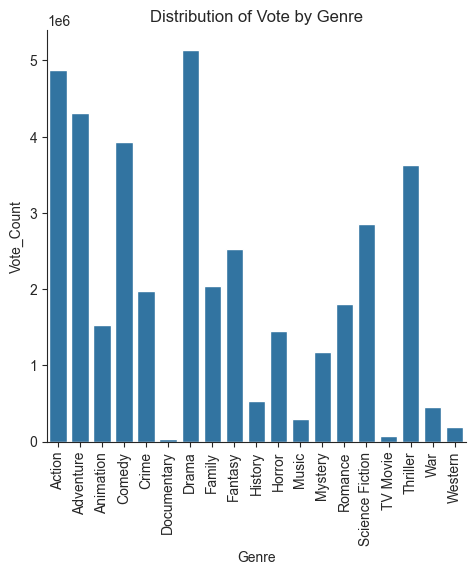

In [263]:
sns.catplot(data=genre_votes, kind='bar').set_xticklabels(rotation=90)
plt.title('Distribution of Vote by Genre')

Typically we can see Drama genre has highest votes

### Q3: What movie got the highest popularity ? what's its genre ?

In [274]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


### Q4: What movie got the lowest popularity ? what's its genre ?

In [275]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


### Q5: Which year has the most filmmed movies?

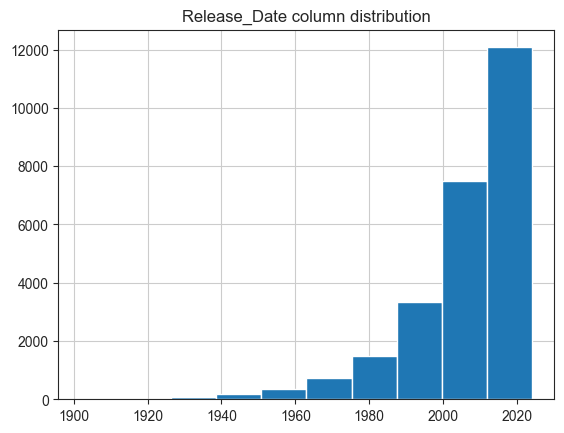

In [277]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()